In [1]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

In [45]:
ipc_class = "E:/New folder/Data Support/IPC/KE_202209/KE_202209_ML1.shp"
schools = "E:/New folder/Data Support/IPC/markets/schools/Schools/Schools.shp"
kenya_ipc = gpd.read_file(ipc_class)
kenya_schools = gpd.read_file(schools)

In [41]:
kenya_ipc.head()

,cov_start,cov_end,report_mon,country,unit_name,ADMIN0,ADMIN1,ADMIN2,ADMIN3,LZCODE,LZNAME,ML1,HA1,fewsnet_re,geometry
0,09-2022,09-2022,09-2022,KE,"Central Highlands, High Potential Zone, Buuri,...",Kenya,Meru,Buuri,None,KE19,"Central Highlands, High Potential Zone",1,0,East Africa,"POLYGON ((37.67888 0.14739, 37.67575 0.14754, ..."
1,09-2022,09-2022,09-2022,KE,"Central Highlands, High Potential Zone, Centra...",Kenya,Meru,Central Imenti,None,KE19,"Central Highlands, High Potential Zone",1,0,East Africa,"POLYGON ((37.80530 0.00274, 37.80227 -0.03663,..."
2,09-2022,09-2022,09-2022,KE,"Central Highlands, High Potential Zone, Chuka/...",Kenya,Tharaka Nithi,Chuka/Igambang'Ombe,None,KE19,"Central Highlands, High Potential Zone",1,0,East Africa,"POLYGON ((37.76675 -0.29604, 37.76242 -0.31192..."
3,09-2022,09-2022,09-2022,KE,"Central Highlands, High Potential Zone, Dagore...",Kenya,Nairobi,Dagoretti North,None,KE19,"Central Highlands, High Potential Zone",1,0,East Africa,"POLYGON ((36.81236 -1.27503, 36.81236 -1.27507..."
4,09-2022,09-2022,09-2022,KE,"Central Highlands, High Potential Zone, Dagore...",Kenya,Nairobi,Dagoretti South,None,KE19,"Central Highlands, High Potential Zone",1,0,East Africa,"POLYGON ((36.71942 -1.26371, 36.72013 -1.26444..."


In [46]:
kenya_schools

,OBJECTID,CODE,SCHOOL_NAM,LEVEL,Status,County,DISTRICT,ZONE,SUB_COUNTY,Ward,X_Coord,Y_Coord,Source,geometry
0,1,1.0,BAKWANIN,Primary,Public,Baringo,BARINGO CENTRAL,KABASIS,Baringo Central,Sacho,35.797080,0.409550,"Ministry of Education, 2016",POINT (143417.238 10045338.886)
1,2,2.0,BEKIBON,Primary,Public,Baringo,BARINGO CENTRAL,TENGES,Baringo South,Marigat,35.884060,0.336400,"Ministry of Education, 2016",POINT (153107.652 10037237.735)
2,3,3.0,BOKORIN,Primary,Public,Baringo,BARINGO CENTRAL,KABARNET,Baringo Central,Kapropita,35.771770,0.532180,"Ministry of Education, 2016",POINT (140602.763 10058916.014)
3,4,4.0,BOROWONIN,Primary,Public,Baringo,BARINGO CENTRAL,KABARNET,Baringo Central,Kapropita,35.778640,0.444870,"Ministry of Education, 2016",POINT (141363.771 10049249.854)
4,5,5.0,BOSIN,Primary,Public,Baringo,BARINGO CENTRAL,KABASIS,Baringo Central,Sacho,35.795450,0.438090,"Ministry of Education, 2016",POINT (143236.887 10048498.462)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37925,37926,200732453.0,SALVATION ARMY NAWOITORONG SEC SCH,Secondary,None,TURKANA,None,None,None,KANAMKEMER,35.620267,3.113988,"Open Data Kenya, School 2007",POINT (124253.791 10344795.181)
37926,37927,200732462.0,MOYALE ODDA MILITARY CAMP SEC,Secondary,None,MARSABIT,None,None,None,BUTIYE,39.090567,3.463152,"Open Data Kenya, School 2007",POINT (510059.563 10382787.508)
37927,37928,200732466.0,OBBU SEC,Secondary,None,MARSABIT,None,None,None,SOLOLO,38.644848,3.546583,"Open Data Kenya, School 2007",POINT (460555.403 10392016.569)
37928,37929,200732474.0,NAPATA REFUGEE SEC SCH,Secondary,None,TURKANA,None,None,None,LOPUR,34.835844,3.739390,"Open Data Kenya, School 2007",POINT (37206.754 10414419.116)


In [42]:
kenya_ipc.ADMIN1.unique()

array(['Meru', 'Tharaka Nithi', 'Nairobi', "Murang'a", 'Kiambu',
       'Kirinyaga', 'Nyeri', 'Nyandarua', 'Laikipia', 'Embu', 'Machakos',
       'Lamu', 'Kilifi', 'Tana River', 'Kajiado', 'Makueni', 'Kwale',
       'Kitui', 'Taita Taveta', 'Mombasa', 'Garissa', 'Wajir', 'Isiolo',
       'Marsabit', 'Turkana', 'Samburu', 'Siaya', 'Busia', 'Homa Bay',
       'Kisumu', 'Migori', 'Mandera', 'West Pokot', 'Baringo', 'Narok',
       'Nakuru', 'Elgeyo-Marakwet', 'Uasin Gishu', 'Kericho', 'Nandi',
       'Kisii', 'Bomet', 'Nyamira', 'Bungoma', 'Kakamega', 'Trans Nzoia',
       'Vihiga'], dtype=object)

In [43]:
embu=kenya_ipc.loc[kenya_ipc['ADMIN1']=='Embu']
kajiado=kenya_ipc.loc[kenya_ipc['ADMIN1']=='Kajiado']
kitui=kenya_ipc.loc[kenya_ipc['ADMIN1']=='Kitui']
kieni=kenya_ipc.loc[kenya_ipc['ADMIN2']=='Kieni']

In [38]:
kajiado

,cov_start,cov_end,report_mon,country,unit_name,ADMIN0,ADMIN1,ADMIN2,ADMIN3,LZCODE,LZNAME,ML1,HA1,fewsnet_re,geometry
70,09-2022,09-2022,09-2022,KE,Coastal Marginal Agricultural Mixed Farming Zo...,Kenya,Kajiado,Kajiado South,None,KE13,Coastal Marginal Agricultural Mixed Farming Zone,2,0,East Africa,"POLYGON ((37.88002 -3.00965, 37.87631 -3.03728..."
344,09-2022,09-2022,09-2022,KE,"Southeastern Marginal Mixed Farming Zone, Kaji...",Kenya,Kajiado,Kajiado East,None,KE16,Southeastern Marginal Mixed Farming Zone,2,0,East Africa,"POLYGON ((37.45878 -2.07833, 37.45956 -2.07865..."
414,09-2022,09-2022,09-2022,KE,"Southern Agropastoral Zone, Kajiado East, Kaji...",Kenya,Kajiado,Kajiado East,None,KE18,Southern Agropastoral Zone,2,0,East Africa,"POLYGON ((36.89071 -1.41386, 36.88921 -1.42194..."
415,09-2022,09-2022,09-2022,KE,"Southern Agropastoral Zone, Kajiado North, Kaj...",Kenya,Kajiado,Kajiado North,None,KE18,Southern Agropastoral Zone,2,0,East Africa,"POLYGON ((36.63610 -1.29853, 36.64914 -1.30095..."
416,09-2022,09-2022,09-2022,KE,"Southern Agropastoral Zone, Kajiado West, Kaji...",Kenya,Kajiado,Kajiado West,None,KE18,Southern Agropastoral Zone,2,0,East Africa,"POLYGON ((36.53897 -1.15056, 36.53555 -1.16417..."
431,09-2022,09-2022,09-2022,KE,"Southern Pastoral Zone, Kajiado Central, Kajia...",Kenya,Kajiado,Kajiado Central,None,KE15,Southern Pastoral Zone,2,0,East Africa,"POLYGON ((36.82772 -1.77507, 36.82894 -1.79472..."
432,09-2022,09-2022,09-2022,KE,"Southern Pastoral Zone, Kajiado East, Kajiado,...",Kenya,Kajiado,Kajiado East,None,KE15,Southern Pastoral Zone,2,0,East Africa,"POLYGON ((37.18751 -1.94143, 37.38460 -2.07788..."
433,09-2022,09-2022,09-2022,KE,"Southern Pastoral Zone, Kajiado South, Kajiado...",Kenya,Kajiado,Kajiado South,None,KE15,Southern Pastoral Zone,2,0,East Africa,"POLYGON ((37.64035 -2.37254, 37.64773 -2.37266..."
434,09-2022,09-2022,09-2022,KE,"Southern Pastoral Zone, Kajiado West, Kajiado,...",Kenya,Kajiado,Kajiado West,None,KE15,Southern Pastoral Zone,2,0,East Africa,"POLYGON ((36.80145 -1.58416, 36.80593 -1.59263..."


(33.51131896975005, 42.298495483250264, -5.185307659511332, 5.974385181731248)

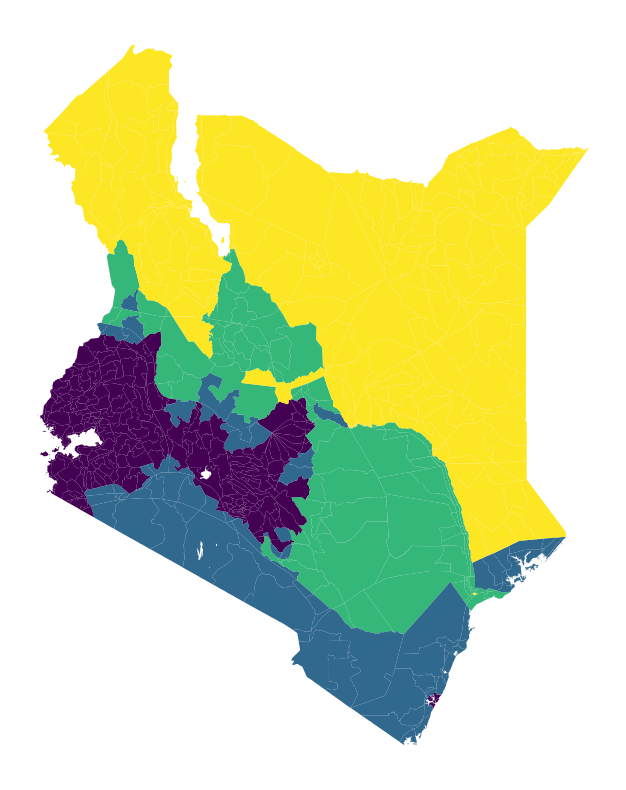

In [44]:
fig,ax = plt.subplots(figsize=(10,10))
kenya_ipc.plot(ax=ax, column='ML1')
ax.axis('off')

In [50]:
primary=kenya_schools.loc[kenya_schools['LEVEL']=='Primary']
secondary=kenya_schools.loc[kenya_schools['LEVEL']=='Secondary']

(-109446.4859658754, 864852.2782503669, 9429907.27374865, 10640594.265576525)

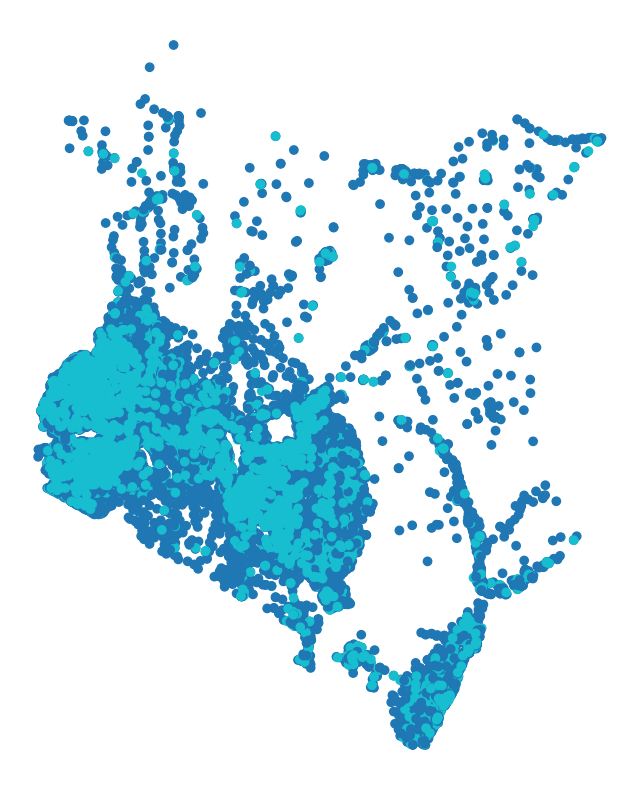

In [49]:
fig,ax = plt.subplots(figsize=(10,10))
kenya_schools.plot(ax=ax, column='LEVEL')
ax.axis('off')

(-109446.4859658754, 864852.2782503669, 9429907.27374865, 10640594.265576525)

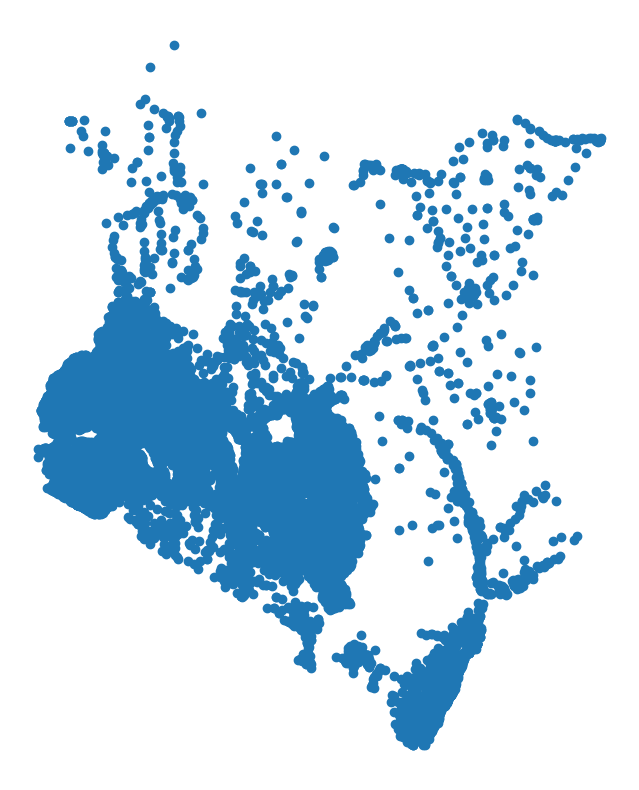

In [51]:
fig,ax = plt.subplots(figsize=(10,10))
primary.plot(ax=ax)
ax.axis('off')

(-104154.06651005824, 861543.0761807526, 9437226.175299898, 10517427.535884656)

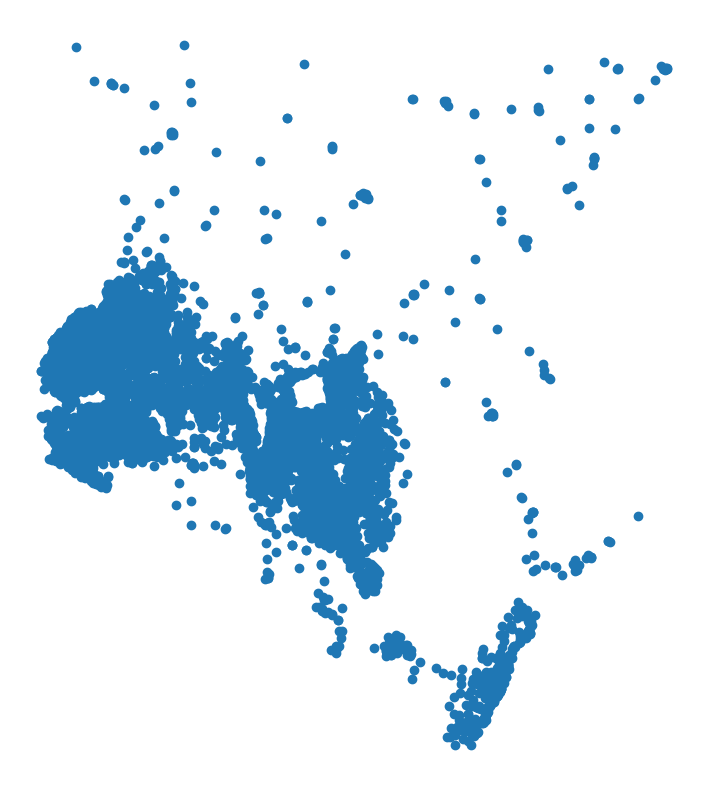

In [52]:
fig,ax = plt.subplots(figsize=(10,10))
secondary.plot(ax=ax)
ax.axis('off')

(37.23447763348776,
 37.969981783362726,
 -0.9564292386778507,
 -0.11384399896351557)

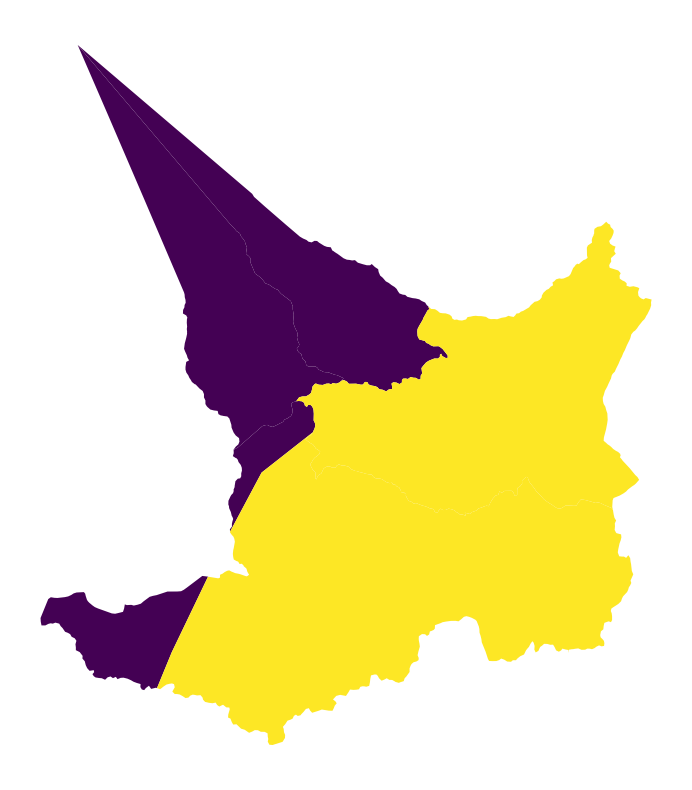

In [29]:
fig,ax = plt.subplots(figsize=(10,10))
embu.plot(ax=ax, column='ML1')
ax.axis('off')

(35.90355041466517, 38.04213403183513, -3.2967905446574033, -0.934986345892378)

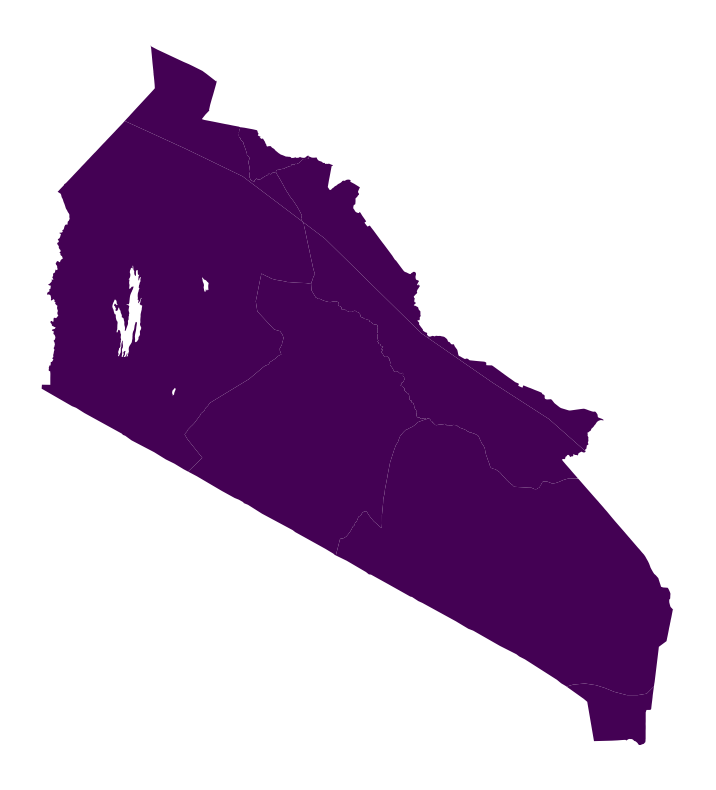

In [33]:
fig,ax = plt.subplots(figsize=(10,10))
kajiado.plot(ax=ax, column='ML1')
ax.axis('off')

(37.521368341806856, 39.1532847178601, -3.221788739439754, 0.09495621933967335)

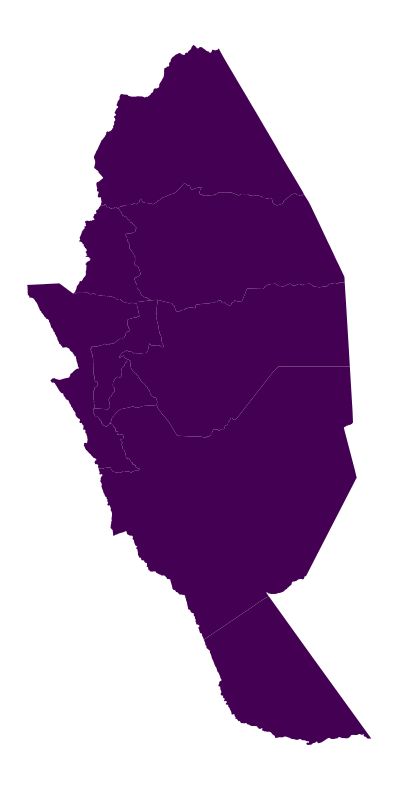

In [34]:
fig,ax = plt.subplots(figsize=(10,10))
kitui.plot(ax=ax, column='ML1')
ax.axis('off')

(36.56957284896313,
 37.343748873278955,
 -0.48229305835226466,
 0.03356449160207031)

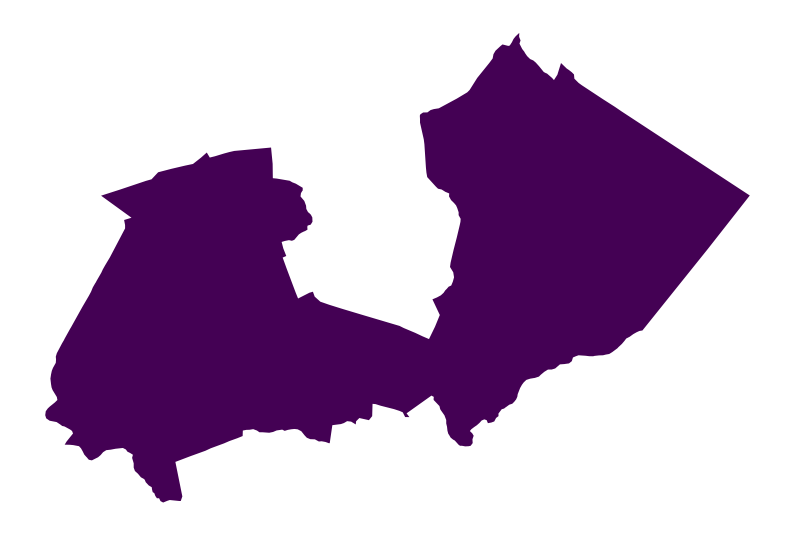

In [35]:
fig,ax = plt.subplots(figsize=(10,10))
kieni.plot(ax=ax, column='ML1')
ax.axis('off')